# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [65]:
# Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline





In [2]:
employee_df = pd.read_csv('D:/Data Science/Ironhack/GitHub/Week 5/lab-linear-regression-correlation/data/absences.csv')

df = employee_df.copy()

In [3]:
df.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

Text(0, 0.5, 'Absences')

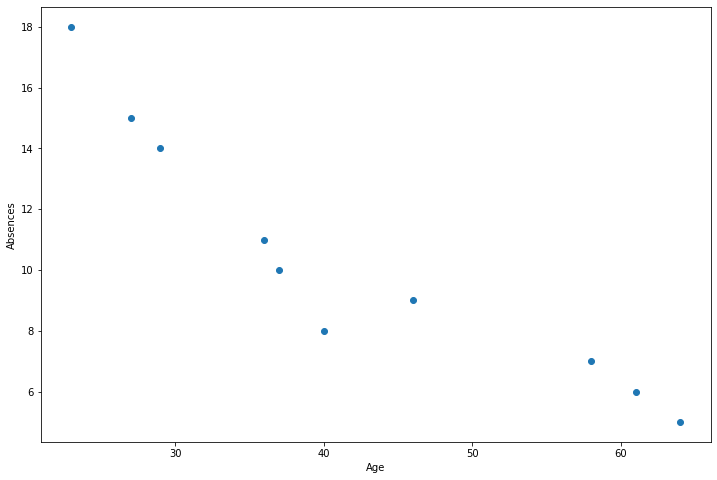

In [4]:
fig, ax = plt.subplots(figsize = (12,8))

plt.scatter(df["Age"], df['Absences'])
plt.xlabel("Age")
plt.ylabel("Absences")

In [5]:
# your comments here:

# It's seem to have negative correlation. In other words, if the employee is younger he has more absence and vice versa. 

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [89]:
# your code here

def get_slope_and_intercept(x, y):

    # Slope
    slope = (np.mean(x*y) - (np.mean(x) * np.mean(y))) / \
        (np.mean(np.power(x, 2)) - np.power(np.mean(x), 2))

    # Intercept
    intercept = np.mean(y) - (np.mean(x) * slope)

    return slope, intercept

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [12]:
slope, intercept = (get_slope_and_intercept(df['Age'], df['Absences']))

print(f"Regression line between Age and Absences has slope {slope} and intercept {intercept}")

Regression line between Age and Absences has slope -0.26810883370334093 and intercept 21.587381898910657


<AxesSubplot:xlabel='Age', ylabel='Absences'>

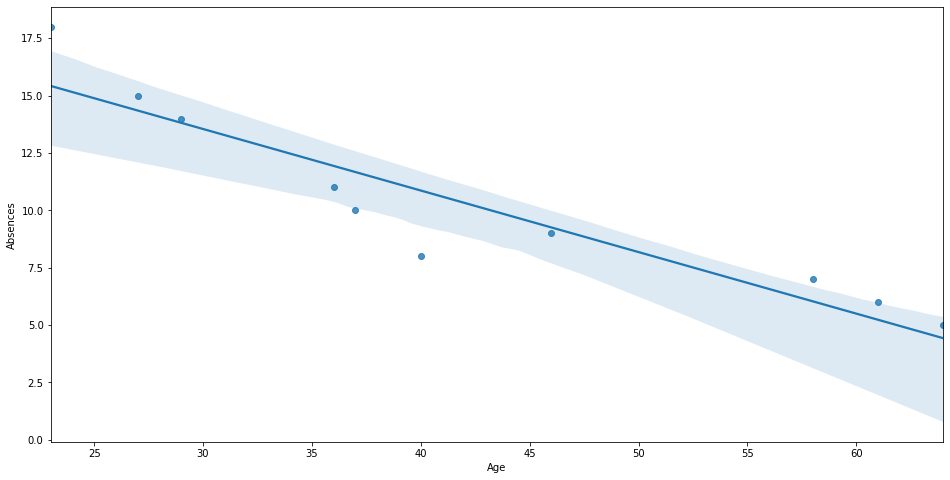

In [32]:
fig2, ax2 = plt.subplots(figsize = (16,8))

sns.regplot(x='Age', y='Absences', data=df)

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [90]:
# your code here

def get_correlation_and_covariance(x, y):

    # correlation

    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_square_x = np.sum(x ** 2)
    sum_square_y = np.sum(y ** 2)
    sum_x_multiply_y = np.sum(x * y)

    correlation = (n * sum_x_multiply_y - sum_x * sum_y) / np.sqrt((n *
                                                                    sum_square_x - (sum_x ** 2)) * (n * sum_square_y - (sum_y ** 2)))

    # covariance

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    covariance = np.sum((x - mean_x) * (y - mean_y)) / (n - 1)

    return correlation, covariance

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [91]:
# your code here

corr, covariance = get_correlation_and_covariance(df['Age'], df['Absences'])
corr, covariance

(-0.9325434092481012, -57.699999999999996)

In [61]:
# your comments here

# Correlation is very high negative, that means, the older employee is the less likelihood of absences has and vice versa. 
# Covariance is negative, therefore the variables age and absences are negatively dependent. 

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [62]:
# your comments here

# Yes, we have three factors that shows us, that age is an indicator of absenteeism. 
# 1. Scatterplot shows us negative correlation
# 2. Correlation coeefficient is negative
# 3. Covariance is negative. 


## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [75]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [79]:
# your code here

ironbeers_corr, ironbeers_cov = get_correlation_and_covariance(ironbeers_df['X'], ironbeers_df['Y'])

ironbeers_corr, ironbeers_cov

(0.9770084209183943, 12.0)

In [65]:
# your comments here

# Very high positive correlation, that measn the more people I tell to stay, the more will stay.
# Covariance is positive, that means the variables are positively dependent.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

Text(0, 0.5, 'Actualy stayed')

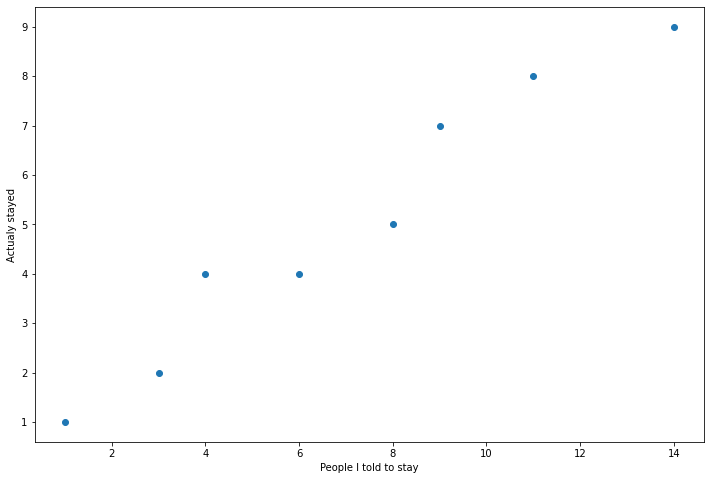

In [80]:
# your code here

fig3, ax3 = plt.subplots(figsize = (12,8))

plt.scatter(ironbeers_df['X'], ironbeers_df['Y'])
plt.xlabel("People I told to stay")
plt.ylabel("Actualy stayed")

In [66]:
# your comments here

# Very clearly we can see there is positive correlation between two variables. The more I tell, the more they stay

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [88]:
slope, intercept = get_slope_and_intercept(ironbeers_df['X'], ironbeers_df['Y'])

print(f"Regression line between People I tell them to stay and Actualy stayed has slope {slope:.2f} and intercept {intercept:.2f}")

Regression line between People I tell them to stay and Actualy stayed has slope 0.64 and intercept 0.55


<AxesSubplot:xlabel='X', ylabel='Y'>

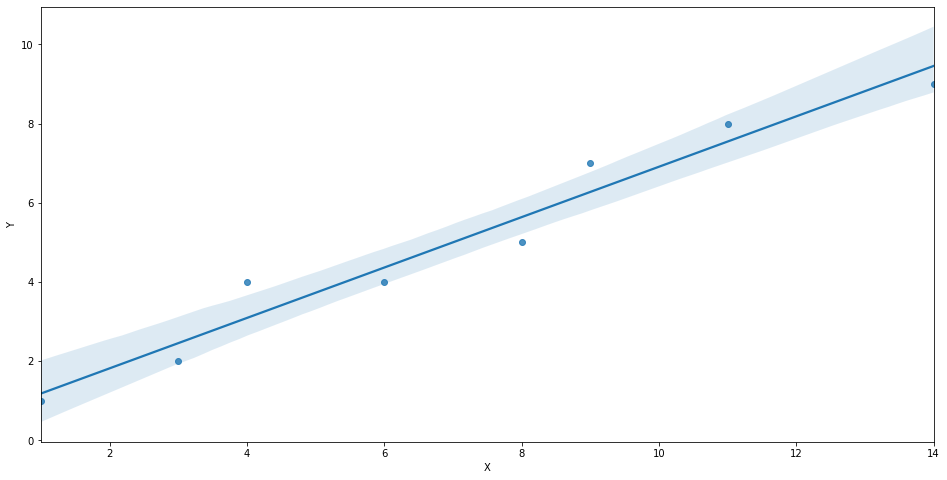

In [82]:
# your code here

fig4, ax5 = plt.subplots(figsize = (16,8))

sns.regplot(x='X', y='Y', data=ironbeers_df)

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here

# We can calmly reject our initial hypothesis and say that the more people I invite, the more will stay for a bear. 


## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

,X,Y,expected_Y
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


R2_score: 0.9545454545454548


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,4,4,3.090909,0.909091
3,6,4,4.363636,-0.363636
4,8,5,5.636364,-0.636364
5,9,7,6.272727,0.727273
6,11,8,7.545455,0.454545
7,14,9,9.454545,-0.454545


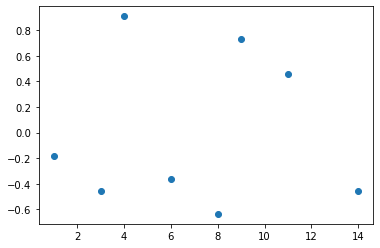

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# comment here

#### 4.- Remove the points with a high error (0.6 threshold) and recalculate the regression line.

In [49]:
# your code here 


,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,6,4,4.363636,-0.363636
3,8,5,5.636364,-0.636364
4,11,8,7.545455,0.454545
5,14,9,9.454545,-0.454545


Plot before deleting higher error data points: 


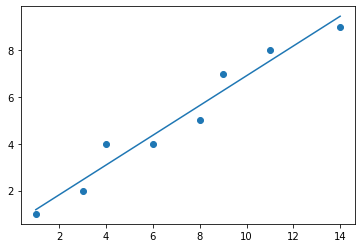

Plot after deleting higher error data points: 


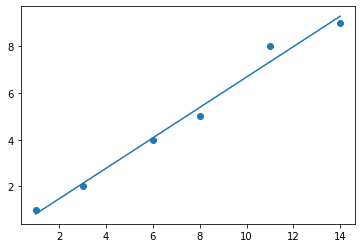

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here


Covariance and correlation before deleting higher error data points: 


(12.0, 0.9770084209183943)

Covariance and correlation after deleting higher error data points: 


(15.433333333333332, 0.9928560954470167)

In [87]:
# your comments here

